<a href="https://colab.research.google.com/github/data2450/air_qulity_pr_zindi_ch/blob/main/air_qu_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple example is even if you aggregate the pm2_5 each day you are basically using future values to predict the past, and the model will easily exploit this information to give you good scores

In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/S/Train (1).csv')
ts=pd.read_csv('/content/drive/MyDrive/S/Test (1).csv')

In [ ]:
train.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
0,ID_0038MG0B,2020-04-23 17:00:00+03:00,USEmbassy,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,0.299255,32.592686,1199,4374,21,14,6834,130,25.0
1,ID_008ASVDD,2020-02-23 19:00:00+03:00,USEmbassy,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,0.299255,32.592686,1199,4374,21,14,6834,130,68.0
2,ID_009ACJQ9,2021-01-23 04:00:00+03:00,Nakawa,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,0.331740,32.609510,1191,5865,31,-11,4780,500,149.7
3,ID_00IGMAQ2,2019-12-04 09:00:00+03:00,USEmbassy,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,0.299255,32.592686,1199,4374,21,14,6834,130,54.0
4,ID_00P76VAQ,2019-10-01 01:00:00+03:00,USEmbassy,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,0.299255,32.592686,1199,4374,21,14,6834,130,39.0


In [ ]:
ts.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road
0,ID_00OZLF7X,2020-03-13 07:00:00+03:00,USEmbassy,31.900455,35.515455,31.672273,37.051818,0.927167,21.175000,0.299255,32.592686,1199,4374,21,14,6834,130
1,ID_00ZI0D98,2020-08-08 10:00:00+03:00,Makerere,53.581818,66.603636,50.586364,64.651818,0.811583,22.350000,0.333501,32.568561,1233,6340,21,28,8518,475
2,ID_017GTLAU,2020-08-25 09:00:00+03:00,Makerere,62.377500,71.647500,59.023333,69.766667,0.902000,20.766667,0.333501,32.568561,1233,6340,21,28,8518,475
3,ID_01IBM7T2,2020-06-15 16:00:00+03:00,USEmbassy,33.310294,36.958824,33.060882,38.674412,0.643417,25.483333,0.299255,32.592686,1199,4374,21,14,6834,130
4,ID_01II27D4,2021-01-13 00:00:00+03:00,Nakawa,64.782045,75.247500,64.638182,77.108864,0.939667,20.133333,0.331740,32.609510,1191,5865,31,-11,4780,500


In [ ]:
train['pa']=1
ts['pa']=0

In [ ]:
all_data=pd.concat((train,ts)).reset_index(drop=True)
print('shape :', all_data.shape )

shape : (13665, 19)


In [ ]:
all_data['year']=pd.to_datetime(all_data['created_at']).dt.year

all_data['month']=pd.to_datetime(all_data['created_at']).dt.month

all_data['hour']=pd.to_datetime(all_data['created_at']).dt.hour

all_data['date']=pd.to_datetime(all_data['created_at']).dt.day

In [ ]:
train['year']=pd.to_datetime(train['created_at']).dt.year

train['month']=pd.to_datetime(train['created_at']).dt.month

train['hour']=pd.to_datetime(train['created_at']).dt.hour

train['date']=pd.to_datetime(train['created_at']).dt.day

train['dd']=pd.to_datetime(train['created_at']).dt.date

In [ ]:
train.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,pa,year,month,hour,date,dd
0,ID_0038MG0B,2020-04-23 17:00:00+03:00,USEmbassy,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,0.299255,32.592686,1199,4374,21,14,6834,130,25.0,1,2020,4,17,23,2020-04-23
1,ID_008ASVDD,2020-02-23 19:00:00+03:00,USEmbassy,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,0.299255,32.592686,1199,4374,21,14,6834,130,68.0,1,2020,2,19,23,2020-02-23
2,ID_009ACJQ9,2021-01-23 04:00:00+03:00,Nakawa,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,0.331740,32.609510,1191,5865,31,-11,4780,500,149.7,1,2021,1,4,23,2021-01-23
3,ID_00IGMAQ2,2019-12-04 09:00:00+03:00,USEmbassy,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,0.299255,32.592686,1199,4374,21,14,6834,130,54.0,1,2019,12,9,4,2019-12-04
4,ID_00P76VAQ,2019-10-01 01:00:00+03:00,USEmbassy,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,0.299255,32.592686,1199,4374,21,14,6834,130,39.0,1,2019,10,1,1,2019-10-01


In [ ]:
print(train.dd.min())
train.dd.max()

2019-07-25


datetime.date(2021, 2, 28)

In [ ]:
ts['year']=pd.to_datetime(ts['created_at']).dt.year

ts['month']=pd.to_datetime(ts['created_at']).dt.month

ts['hour']=pd.to_datetime(ts['created_at']).dt.hour

ts['date']=pd.to_datetime(ts['created_at']).dt.day

ts['dd']=pd.to_datetime(ts['created_at']).dt.date

In [ ]:
ts.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,pa,year,month,hour,date,dd
0,ID_00OZLF7X,2020-03-13 07:00:00+03:00,USEmbassy,31.900455,35.515455,31.672273,37.051818,0.927167,21.175000,0.299255,32.592686,1199,4374,21,14,6834,130,0,2020,3,7,13,2020-03-13
1,ID_00ZI0D98,2020-08-08 10:00:00+03:00,Makerere,53.581818,66.603636,50.586364,64.651818,0.811583,22.350000,0.333501,32.568561,1233,6340,21,28,8518,475,0,2020,8,10,8,2020-08-08
2,ID_017GTLAU,2020-08-25 09:00:00+03:00,Makerere,62.377500,71.647500,59.023333,69.766667,0.902000,20.766667,0.333501,32.568561,1233,6340,21,28,8518,475,0,2020,8,9,25,2020-08-25
3,ID_01IBM7T2,2020-06-15 16:00:00+03:00,USEmbassy,33.310294,36.958824,33.060882,38.674412,0.643417,25.483333,0.299255,32.592686,1199,4374,21,14,6834,130,0,2020,6,16,15,2020-06-15
4,ID_01II27D4,2021-01-13 00:00:00+03:00,Nakawa,64.782045,75.247500,64.638182,77.108864,0.939667,20.133333,0.331740,32.609510,1191,5865,31,-11,4780,500,0,2021,1,0,13,2021-01-13


In [ ]:
print(ts.dd.min())
ts.dd.max()

2019-07-25


datetime.date(2021, 2, 28)

In [ ]:
train.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,pa,year,month,hour,date,dd
0,ID_0038MG0B,2020-04-23 17:00:00+03:00,USEmbassy,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,0.299255,32.592686,1199,4374,21,14,6834,130,25.0,1,2020,4,17,23,2020-04-23
1,ID_008ASVDD,2020-02-23 19:00:00+03:00,USEmbassy,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,0.299255,32.592686,1199,4374,21,14,6834,130,68.0,1,2020,2,19,23,2020-02-23
2,ID_009ACJQ9,2021-01-23 04:00:00+03:00,Nakawa,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,0.331740,32.609510,1191,5865,31,-11,4780,500,149.7,1,2021,1,4,23,2021-01-23
3,ID_00IGMAQ2,2019-12-04 09:00:00+03:00,USEmbassy,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,0.299255,32.592686,1199,4374,21,14,6834,130,54.0,1,2019,12,9,4,2019-12-04
4,ID_00P76VAQ,2019-10-01 01:00:00+03:00,USEmbassy,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,0.299255,32.592686,1199,4374,21,14,6834,130,39.0,1,2019,10,1,1,2019-10-01


In [ ]:
def q90(x):
    return x.quantile(0.9)


def q25(x):
    return x.quantile(0.25)

def q01(x):
    return x.quantile(0.01)

In [ ]:
train.groupby(['year','month','date'])['ref_pm2_5'].agg(['mean','median','std',q90,q25,q01])

mean  median        std    q90     q25    q01
year month date                                                     
2019 7     25    108.555556    91.0  43.678116  172.8   77.00  67.08
           26    103.173913   100.0  27.017927  130.0   83.50  68.66
           27    130.214286   109.5  56.661177  216.3  100.75  61.08
           28     70.400000    68.5  22.638217   94.5   59.75  35.54
           29     94.300000    92.0  18.733870  120.2   78.75  71.19
...                     ...     ...        ...    ...     ...    ...
2021 2     24    120.095238   107.0  42.657830  182.0   91.00  54.80
           25     94.812500    70.0  44.237569  146.5   64.00  58.30
           26     72.333333    68.5  18.136736   90.9   60.75  45.51
           27     70.470588    60.0  23.955995   88.2   55.00  46.48
           28     61.500000    55.0  19.823486   83.9   49.75  35.36

[494 rows x 6 columns]

In [ ]:
o=train.groupby(['year','month','date'])['ref_pm2_5'].agg(['mean','median','std',q90,q25,q01])

o.reset_index(inplace=True)

o.columns=['year','month','date','mean','med','std','q90','q25','q01']

o['mean']=o['mean'].round(2)

o['std']=o['std'].round(2)

o.head()

#we accuracy decreses remove the 3 numbers

,year,month,date,mean,med,std,q90,q25,q01
0,2019,7,25,108.56,91.0,43.68,172.8,77.00,67.08
1,2019,7,26,103.17,100.0,27.02,130.0,83.50,68.66
2,2019,7,27,130.21,109.5,56.66,216.3,100.75,61.08
3,2019,7,28,70.40,68.5,22.64,94.5,59.75,35.54
4,2019,7,29,94.30,92.0,18.73,120.2,78.75,71.19


# eda

In [ ]:
train.describe()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,pa,year,month,hour,date
count,10932.000000,10932.000000,10932.000000,10932.000000,10926.000000,10915.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.0,10932.000000,10932.000000,10932.000000,10932.000000
mean,51.543471,59.794230,48.183486,56.765928,0.824849,21.962882,0.314090,32.588472,1207.406696,5166.938986,22.570618,14.052415,6990.007135,286.165843,53.018432,1.0,2019.964874,6.865532,11.498719,16.033937
std,34.588032,38.214016,34.259708,38.876526,0.135233,2.803965,0.016704,0.013861,16.369252,904.989287,3.638757,12.404855,1201.835036,175.912188,35.570551,0.0,0.615307,3.948233,6.918048,9.107709
min,0.567273,0.595909,0.000000,0.000000,0.307167,16.175000,0.299255,32.568561,1191.000000,4374.000000,21.000000,-11.000000,4780.000000,130.000000,0.100000,1.0,2019.000000,1.000000,0.000000,1.000000
25%,29.370546,33.740357,26.605675,30.255752,0.735000,19.775000,0.299255,32.568561,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,30.000000,1.0,2020.000000,2.000000,6.000000,8.000000
50%,43.659269,54.310698,42.184865,52.554515,0.857208,21.350000,0.299255,32.592686,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,43.900000,1.0,2020.000000,8.000000,11.000000,16.000000
75%,63.956750,74.936473,60.999375,73.278125,0.933729,24.025000,0.333501,32.592686,1233.000000,6340.000000,21.000000,28.000000,8518.000000,475.000000,66.000000,1.0,2020.000000,10.000000,18.000000,24.000000
max,335.433023,407.713953,330.275152,384.627045,1.000000,30.781818,0.333501,32.609510,1233.000000,6340.000000,31.000000,28.000000,8518.000000,500.000000,459.000000,1.0,2021.000000,12.000000,23.000000,31.000000


In [ ]:
ts.describe()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,pa,year,month,hour,date
count,2733.000000,2733.000000,2733.000000,2733.000000,2732.000000,2729.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.0,2733.000000,2733.00000,2733.000000,2733.000000
mean,52.115167,60.320047,48.884620,57.464163,0.823830,21.997552,0.314090,32.588468,1207.410538,5166.982437,22.569704,14.055982,6990.349067,286.163557,0.0,2019.963044,6.89206,11.607391,16.389682
std,36.221644,39.726532,36.061169,40.804437,0.132842,2.777461,0.016706,0.013863,16.372577,905.158426,3.638394,12.404960,1201.902897,175.933715,0.0,0.607803,3.97398,6.970544,9.062981
min,0.954318,0.982500,0.000000,0.000000,0.320417,16.575000,0.299255,32.568561,1191.000000,4374.000000,21.000000,-11.000000,4780.000000,130.000000,0.0,2019.000000,1.00000,0.000000,1.000000
25%,27.844286,31.470571,25.351591,28.655714,0.738292,19.800000,0.299255,32.568561,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,0.0,2020.000000,2.00000,6.000000,8.000000
50%,44.166279,54.977000,42.573256,53.061860,0.857583,21.433333,0.299255,32.592686,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,0.0,2020.000000,8.00000,12.000000,17.000000
75%,63.894186,74.967317,61.420976,73.904884,0.929110,24.033333,0.333501,32.592686,1233.000000,6340.000000,21.000000,28.000000,8518.000000,475.000000,0.0,2020.000000,10.00000,18.000000,24.000000
max,297.689524,320.712619,291.778571,341.135476,1.000000,30.716667,0.333501,32.609510,1233.000000,6340.000000,31.000000,28.000000,8518.000000,500.000000,0.0,2021.000000,12.00000,23.000000,31.000000


In [ ]:
l_4_f=['site', 'lat', 'long', 'altitude', 'greenness', 'landform_90m','landform_270m', 'population', 'dist_major_road', 'year']

In [ ]:
cat_cols = ['site','created_at']
num_cols = [col for col in all_data.columns if col not in cat_cols+['ID','pa','year','month','hour','date']+l_4_f]

In [ ]:
all_data.nunique()

ID                 13665
created_at         10940
site                   3
pm2_5              13634
pm10               13633
s2_pm2_5           12999
s2_pm10            13015
humidity            4625
temp                1642
lat                    3
long                   3
altitude               3
greenness              3
landform_90m           2
landform_270m          3
population             3
dist_major_road        3
ref_pm2_5           1233
pa                     2
year                   3
month                 12
hour                  24
date                  31
dtype: int64

In [ ]:
train.site.unique()

array(['USEmbassy', 'Nakawa', 'Makerere'], dtype=object)

In [ ]:
#all_data.loc[all_data.site=='Nakawa']

In [ ]:
#ts.site.unique()

In [ ]:
for f in  num_cols:
    data=all_data.copy()
    plt.title(f, fontdict={'size':15})
    print(data[f].nunique(),"\n")
    plt.subplot(121)
    sns.distplot(data[f]);
    plt.subplot(122)
    train[f].plot.box(figsize=(16,5))
    plt.show()

In [ ]:
rel=[col for col in all_data.columns if col not in ['ID','pa','created_at','lat', 'long', 'altitude', 'greenness','landform_270m', 'population', 'dist_major_road']]

In [ ]:
train.describe()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,pa,year,month,hour,date
count,10932.000000,10932.000000,10932.000000,10932.000000,10926.000000,10915.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.0,10932.000000,10932.000000,10932.000000,10932.000000
mean,51.543471,59.794230,48.183486,56.765928,0.824849,21.962882,0.314090,32.588472,1207.406696,5166.938986,22.570618,14.052415,6990.007135,286.165843,53.018432,1.0,2019.964874,6.865532,11.498719,16.033937
std,34.588032,38.214016,34.259708,38.876526,0.135233,2.803965,0.016704,0.013861,16.369252,904.989287,3.638757,12.404855,1201.835036,175.912188,35.570551,0.0,0.615307,3.948233,6.918048,9.107709
min,0.567273,0.595909,0.000000,0.000000,0.307167,16.175000,0.299255,32.568561,1191.000000,4374.000000,21.000000,-11.000000,4780.000000,130.000000,0.100000,1.0,2019.000000,1.000000,0.000000,1.000000
25%,29.370546,33.740357,26.605675,30.255752,0.735000,19.775000,0.299255,32.568561,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,30.000000,1.0,2020.000000,2.000000,6.000000,8.000000
50%,43.659269,54.310698,42.184865,52.554515,0.857208,21.350000,0.299255,32.592686,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,43.900000,1.0,2020.000000,8.000000,11.000000,16.000000
75%,63.956750,74.936473,60.999375,73.278125,0.933729,24.025000,0.333501,32.592686,1233.000000,6340.000000,21.000000,28.000000,8518.000000,475.000000,66.000000,1.0,2020.000000,10.000000,18.000000,24.000000
max,335.433023,407.713953,330.275152,384.627045,1.000000,30.781818,0.333501,32.609510,1233.000000,6340.000000,31.000000,28.000000,8518.000000,500.000000,459.000000,1.0,2021.000000,12.000000,23.000000,31.000000


In [ ]:
tr=all_data[all_data.pa==1]
tr=tr[rel]

In [ ]:
columns=['s2_pm2_5','s2_pm1']

In [ ]:
#tr.loc[(tr.s2_pm2_5>0) & (tr.s2_pm10==0)]

In [ ]:
#tr.loc[(tr.s2_pm2_5==0) & (tr.s2_pm10==0)]

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10932 entries, 0 to 10931
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   site          10932 non-null  object 
 1   pm2_5         10932 non-null  float64
 2   pm10          10932 non-null  float64
 3   s2_pm2_5      10932 non-null  float64
 4   s2_pm10       10932 non-null  float64
 5   humidity      10926 non-null  float64
 6   temp          10915 non-null  float64
 7   landform_90m  10932 non-null  int64  
 8   ref_pm2_5     10932 non-null  float64
 9   year          10932 non-null  int64  
 10  month         10932 non-null  int64  
 11  hour          10932 non-null  int64  
 12  date          10932 non-null  int64  
dtypes: float64(7), int64(5), object(1)
memory usage: 1.2+ MB


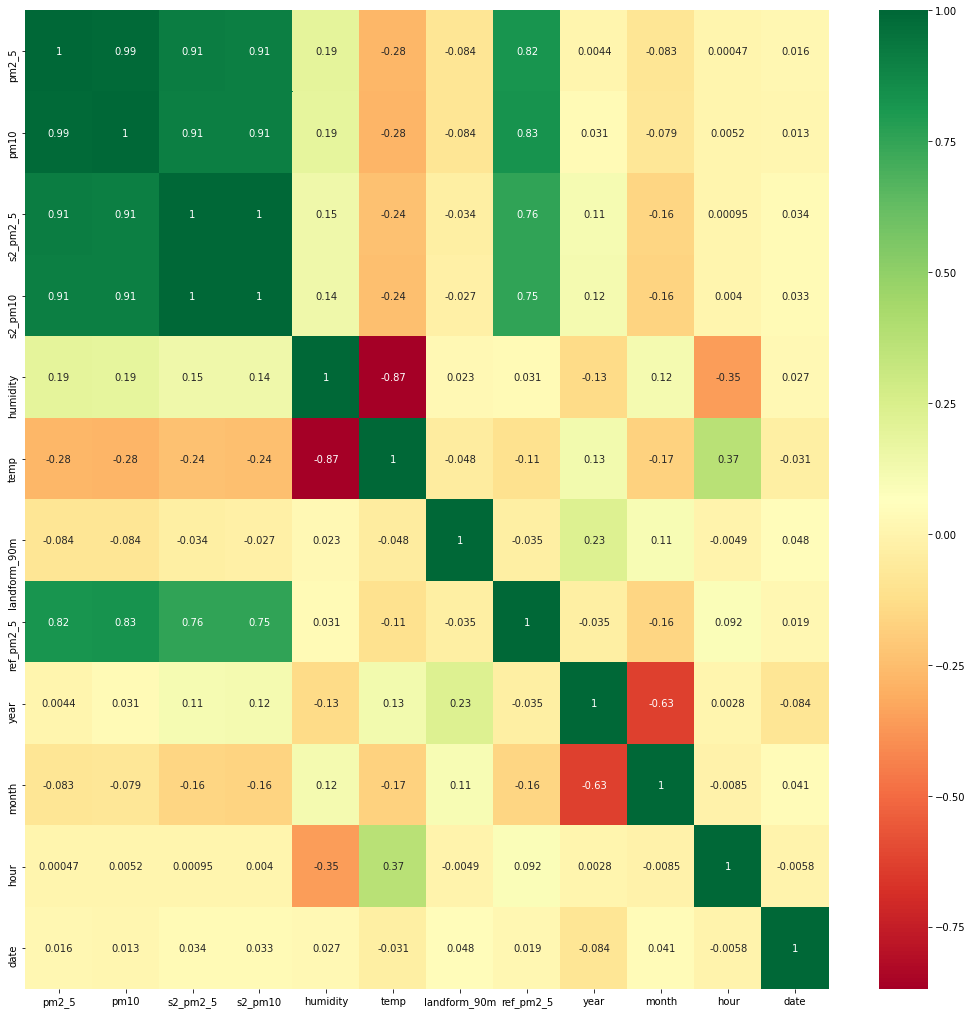

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(tr.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
t=tr[tr.isna().any(axis=1)]
ty=t[['humidity','temp','hour','site']]
ty

,humidity,temp,hour,site
107,0.698333,NaN,15,USEmbassy
217,NaN,23.008333,16,USEmbassy
866,0.720000,NaN,16,USEmbassy
1111,0.761667,NaN,12,USEmbassy
1491,NaN,21.566667,14,USEmbassy
2130,NaN,22.566667,16,Nakawa
2610,0.970000,NaN,9,USEmbassy
4085,0.780000,NaN,11,USEmbassy
4716,0.969167,NaN,0,USEmbassy
4774,NaN,23.008333,16,Makerere


In [ ]:
def impute_nan(cols):
   hu  = cols[0]
   temp = cols[1]
   h    = cols[2]
    
   if pd.isnull(temp):

      if hu== 1 and h ==7 :
            return 17.733333
      if  hu== 1 and h ==6 :
            return 17.5   
      if h ==3:
            return 19.88
      if h ==2:
            return 19.19
      if h ==1:
            return 18.76     
      if h ==9:
            return 21.86 
      if h ==0:
            return 19.52
      if h ==10:
            return 22.13
      if h ==11:
            return 24.37 
      if hu!='NaN' and h==13:
            return 26 
      if h==12:
            return 24.99      
      if h==17:
            return 24.76
      if  hu== 0.72 and h ==16 :
            return 25.116
      if hu!='NaN' and h==15:
            return 25.62             
      elif hu==0.9975 and h==4:
            return 18
      else:
        pass      
   else:
      return temp  


      

In [ ]:
def hum(cols):
   hu  = cols[0]
   temp = cols[1]
   h    = cols[2]
    
   if pd.isnull(hu):

      if  h ==16 :
            return 0.7067
      if h==13:
            return 0.634583   
      if h ==14:
            return 0.704
      if h ==15:
            return 0.609
           
   else:
      return hu  


In [ ]:
tr['temp'] = tr[['humidity','temp','hour']].apply(impute_nan,axis=1)

tr['humidity'] = tr[['humidity','temp','hour']].apply(hum,axis=1)

In [ ]:
site = tr[["site"]]

site = pd.get_dummies(site, drop_first= True)

In [ ]:
tr=pd.concat([tr,site], axis = 1)

tr=tr.drop(['site','landform_90m'],axis=1)

#tr["landform_90m"].replace([21,31],[1,0],inplace = True)

In [ ]:
tr.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,ref_pm2_5,year,month,hour,date,site_Nakawa,site_USEmbassy
0,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,25.0,2020,4,17,23,0,1
1,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,68.0,2020,2,19,23,0,1
2,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,149.7,2021,1,4,23,1,0
3,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,54.0,2019,12,9,4,0,1
4,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,39.0,2019,10,1,1,0,1


In [ ]:
tr.loc[tr.s2_pm2_5==0]

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,ref_pm2_5,year,month,hour,date,site_Nakawa,site_USEmbassy
3,49.732821,61.512564,0.0,0.0,0.949667,21.216667,54.0,2019,12,9,4,0,1
42,85.874222,93.015778,0.0,0.0,0.998583,19.125000,94.0,2019,12,10,7,0,1
73,125.273409,135.531818,0.0,0.0,0.998083,18.708333,129.0,2019,12,7,1,0,1
97,22.036818,24.807955,0.0,0.0,0.980750,18.366667,22.0,2019,11,5,25,0,1
107,8.957111,10.056222,0.0,0.0,0.698333,25.620000,29.0,2019,12,15,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,114.786279,124.400233,0.0,0.0,0.961167,19.841667,108.0,2019,12,3,4,0,1
10889,28.604545,33.814091,0.0,0.0,0.984667,19.925000,41.0,2019,11,7,22,0,1
10900,135.510909,146.675909,0.0,0.0,0.979083,19.433333,143.0,2019,12,7,2,0,1
10901,64.261591,74.383182,0.0,0.0,0.895417,21.325000,90.0,2019,12,20,3,0,1


In [ ]:
f_train=tr.copy()

f_train['pro_2']=(f_train['s2_pm2_5']/f_train['pm2_5']).round(2)

f_train['pro_3']=(f_train['s2_pm10']/f_train['pm10']).round(2)

f_train['pro_1']=(f_train['s2_pm2_5']/f_train['s2_pm10']).round(2)

f_train['temp']=f_train['temp'].round(2)


f_train['humidity']=f_train['humidity'].round(3)

f_train['pm2_5']=f_train['pm2_5'].round(2)

f_train['s2_pm2_5']=f_train['s2_pm2_5'].round(2)

f_train['pm10']=f_train['pm10'].round(2)

f_train['s2_pm10']=f_train['s2_pm10'].round(2)

f_train['pro_unit']=(f_train['temp']/f_train['humidity']).round(2)

f_train['pro']=(f_train['pm2_5']/f_train['pm10']).round(2)

In [ ]:
f_train.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,ref_pm2_5,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro
0,6.82,7.31,6.79,7.84,0.807,22.38,25.0,2020,4,17,23,0,1,1.00,1.07,0.87,27.73,0.93
1,57.46,67.88,55.64,70.65,0.712,25.35,68.0,2020,2,19,23,0,1,0.97,1.04,0.79,35.60,0.85
2,170.01,191.15,165.31,191.47,0.908,20.62,149.7,2021,1,4,23,1,0,0.97,1.00,0.86,22.71,0.89
3,49.73,61.51,0.00,0.00,0.950,21.22,54.0,2019,12,9,4,0,1,0.00,0.00,NaN,22.34,0.81
4,41.63,51.04,41.72,51.14,0.914,18.91,39.0,2019,10,1,1,0,1,1.00,1.00,0.82,20.69,0.82


In [ ]:
f_train[f_train.isna().any(axis=1)]

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,ref_pm2_5,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro


In [ ]:
f_train=f_train.fillna(0)

In [ ]:
f_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10932 entries, 0 to 10931
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pm2_5           10932 non-null  float64
 1   pm10            10932 non-null  float64
 2   s2_pm2_5        10932 non-null  float64
 3   s2_pm10         10932 non-null  float64
 4   humidity        10932 non-null  float64
 5   temp            10932 non-null  float64
 6   ref_pm2_5       10932 non-null  float64
 7   year            10932 non-null  int64  
 8   month           10932 non-null  int64  
 9   hour            10932 non-null  int64  
 10  date            10932 non-null  int64  
 11  site_Nakawa     10932 non-null  uint8  
 12  site_USEmbassy  10932 non-null  uint8  
 13  pro_2           10932 non-null  float64
 14  pro_3           10932 non-null  float64
 15  pro_1           10932 non-null  float64
 16  pro_unit        10932 non-null  float64
 17  pro             10932 non-null 

In [ ]:
o=o.fillna(0)

In [ ]:
o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    494 non-null    int64  
 1   month   494 non-null    int64  
 2   date    494 non-null    int64  
 3   mean    494 non-null    float64
 4   med     494 non-null    float64
 5   std     494 non-null    float64
 6   q90     494 non-null    float64
 7   q25     494 non-null    float64
 8   q01     494 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 34.9 KB


In [ ]:
f_train=pd.merge(f_train, o , on=['year','month','date'],how='left')

In [ ]:
f_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10932 entries, 0 to 10931
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pm2_5           10932 non-null  float64
 1   pm10            10932 non-null  float64
 2   s2_pm2_5        10932 non-null  float64
 3   s2_pm10         10932 non-null  float64
 4   humidity        10932 non-null  float64
 5   temp            10932 non-null  float64
 6   ref_pm2_5       10932 non-null  float64
 7   year            10932 non-null  int64  
 8   month           10932 non-null  int64  
 9   hour            10932 non-null  int64  
 10  date            10932 non-null  int64  
 11  site_Nakawa     10932 non-null  uint8  
 12  site_USEmbassy  10932 non-null  uint8  
 13  pro_2           10932 non-null  float64
 14  pro_3           10932 non-null  float64
 15  pro_1           10932 non-null  float64
 16  pro_unit        10932 non-null  float64
 17  pro             10932 non-null 

In [ ]:
#extra





#f_train['ag_x']=((f_train['pro_unit'])/f_train['humidity']).round(2)
#f_train['ag_y']=(f_train['hour']/f_train['pro_unit']).round(2)

In [ ]:
tyu=['pm2_5','pm10','s2_pm2_5','s2_pm10','humidity','temp','pro_unit','hour','month']

In [ ]:
f_train.describe()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,ref_pm2_5,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
count,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000
mean,51.543445,59.794243,48.183518,56.765950,0.824765,21.963173,53.018432,2019.964874,6.865532,11.498719,16.033937,0.157062,0.558727,0.808655,28.140722,0.861659,53.018100,47.904876,24.412471,83.237700,35.822059,23.785820
std,34.588064,38.214082,34.259731,38.876501,0.135251,2.804632,35.570551,0.615307,3.948233,6.918048,9.107709,0.363876,0.496562,0.182347,9.626566,0.063327,23.515307,23.383848,12.134927,36.041353,18.449989,16.118268
min,0.570000,0.600000,0.000000,0.000000,0.307000,16.180000,0.100000,2019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.210000,0.580000,1.370000,0.700000,0.000000,2.700000,0.450000,0.108000
25%,29.370000,33.740000,26.607500,30.257500,0.735000,19.770000,30.000000,2020.000000,2.000000,6.000000,8.000000,0.000000,0.000000,0.800000,21.307500,0.820000,37.400000,32.800000,16.000000,57.930000,24.725000,12.976000
50%,43.660000,54.315000,42.185000,52.555000,0.857000,21.360000,43.900000,2020.000000,8.000000,11.000000,16.000000,0.000000,1.000000,0.840000,24.880000,0.860000,48.170000,42.375000,21.665000,77.000000,31.250000,21.114000
75%,63.960000,74.932500,61.000000,73.277500,0.934000,24.020000,66.000000,2020.000000,10.000000,18.000000,24.000000,0.000000,1.000000,0.880000,32.610000,0.910000,61.420000,56.000000,31.100000,97.720000,42.000000,29.880000
max,335.430000,407.710000,330.280000,384.630000,1.000000,30.780000,459.000000,2021.000000,12.000000,23.000000,31.000000,1.000000,1.000000,1.000000,98.020000,1.000000,185.380000,196.000000,75.360000,263.000000,164.000000,144.960000


In [ ]:
f_train=f_train.loc[f_train.ref_pm2_5<400]

In [ ]:
for feature in tyu:
        data=f_train.copy()
        plt.scatter(data[feature],data['ref_pm2_5'],alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel('ref_pm2_5')
        plt.show()

# test

In [ ]:
t_rel=['ID','site','pm2_5','pm10','s2_pm2_5','s2_pm10','humidity','temp','landform_90m','year','month','hour','date']

In [ ]:
ts_1=all_data[all_data.pa==0]
ts_1=ts_1[t_rel]

In [ ]:
te=ts_1[ts_1.isna().any(axis=1)]
te=te[['humidity','temp','hour']]
te

,humidity,temp,hour
11032,1.000000,NaN,8
11569,0.724167,NaN,14
11757,0.993333,NaN,5
13036,NaN,23.008333,16
13525,0.982500,NaN,23


In [ ]:
def t_hum(cols):
   hu  = cols[0]
   temp = cols[1]
   h    = cols[2]
    
   if pd.isnull(temp):

      if  hu ==1 and h==8 :
            return 17.38
      if h==5:
            return 18.68   
      if h ==23:
            return 20.55
      if h ==14:
            return 24.408
           
   else:
      return temp  

In [ ]:
ts_1['temp'] = ts_1[['humidity','temp','hour']].apply(t_hum,axis=1)

ts_1.fillna(0.68,inplace=True)

In [ ]:
site = ts_1[["site"]]

site = pd.get_dummies(site, drop_first= True)

In [ ]:
train.head()

,ID,created_at,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,pa,year,month,hour,date,dd
0,ID_0038MG0B,2020-04-23 17:00:00+03:00,USEmbassy,6.819048,7.313810,6.794048,7.838333,0.807417,22.383333,0.299255,32.592686,1199,4374,21,14,6834,130,25.0,1,2020,4,17,23,2020-04-23
1,ID_008ASVDD,2020-02-23 19:00:00+03:00,USEmbassy,57.456047,67.883488,55.643488,70.646977,0.712417,25.350000,0.299255,32.592686,1199,4374,21,14,6834,130,68.0,1,2020,2,19,23,2020-02-23
2,ID_009ACJQ9,2021-01-23 04:00:00+03:00,Nakawa,170.009773,191.153636,165.308636,191.471591,0.907833,20.616667,0.331740,32.609510,1191,5865,31,-11,4780,500,149.7,1,2021,1,4,23,2021-01-23
3,ID_00IGMAQ2,2019-12-04 09:00:00+03:00,USEmbassy,49.732821,61.512564,0.000000,0.000000,0.949667,21.216667,0.299255,32.592686,1199,4374,21,14,6834,130,54.0,1,2019,12,9,4,2019-12-04
4,ID_00P76VAQ,2019-10-01 01:00:00+03:00,USEmbassy,41.630455,51.044545,41.725000,51.141364,0.913833,18.908333,0.299255,32.592686,1199,4374,21,14,6834,130,39.0,1,2019,10,1,1,2019-10-01


In [ ]:
train[['s2_pm2_5','s2_pm10']].loc[train.s2_pm2_5==0]

,s2_pm2_5,s2_pm10
3,0.0,0.0
42,0.0,0.0
73,0.0,0.0
97,0.0,0.0
107,0.0,0.0
...,...,...
10833,0.0,0.0
10889,0.0,0.0
10900,0.0,0.0
10901,0.0,0.0


In [ ]:
ts_1=pd.concat([ts_1,site], axis = 1)

ts_1=ts_1.drop(['site','landform_90m'],axis=1)



#ts_1["landform_90m"].replace([21,31],[1,0],inplace = True)

In [ ]:
ts_1['pro_2']=(ts_1['s2_pm2_5']/ts_1['pm2_5']).round(2)

ts_1['pro_3']=(ts_1['s2_pm10']/ts_1['pm10']).round(2)

ts_1['pro_1']=(ts_1['s2_pm2_5']/ts_1['s2_pm10']).round(2)

ts_1['pro_unit']=(ts_1['temp']/ts_1['humidity']).round(2)

ts_1['pro']=(ts_1['pm2_5']/ts_1['pm10']).round(2)




#ts_1['ag_x']=((ts_1['pro_unit'])/ts_1['humidity']).round(2)
#ts_1['ag_y']=(ts_1['hour']/ts_1['pro_unit']).round(2)

In [ ]:
f_t=ts_1.copy()

f_t['temp']=f_t['temp'].round(2)


f_t['humidity']=f_t['humidity'].round(3)

f_t['pm2_5']=f_t['pm2_5'].round(2)

f_t['s2_pm2_5']=f_t['s2_pm2_5'].round(2)

f_t['pm10']=f_t['pm10'].round(2)

f_t['s2_pm10']=f_t['s2_pm10'].round(2)

In [ ]:
f_t=pd.merge(f_t, o , on=['year','month','date'],how='left')

In [ ]:
f_t.head()

,ID,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
0,ID_00OZLF7X,31.90,35.52,31.67,37.05,0.927,21.18,2020,3,7,13,0,1,0.99,1.04,0.85,22.84,0.90,36.82,36.00,8.86,49.40,30.00,24.480
1,ID_00ZI0D98,53.58,66.60,50.59,64.65,0.812,22.35,2020,8,10,8,0,0,0.94,0.97,0.78,27.54,0.80,46.06,43.65,17.57,71.95,31.05,22.864
2,ID_017GTLAU,62.38,71.65,59.02,69.77,0.902,20.77,2020,8,9,25,0,0,0.95,0.97,0.85,23.02,0.87,53.85,47.10,26.18,94.92,32.10,24.604
3,ID_01IBM7T2,33.31,36.96,33.06,38.67,0.643,25.48,2020,6,16,15,0,1,0.99,1.05,0.85,39.61,0.90,44.13,40.00,10.95,61.20,37.00,29.840
4,ID_01II27D4,64.78,75.25,64.64,77.11,0.940,20.13,2021,1,0,13,1,0,1.00,1.02,0.84,21.43,0.86,52.60,46.80,26.33,76.41,37.40,13.496


In [ ]:
f_t[f_t.isnull().any(axis=1)]

,ID,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
21,ID_0BRD0DWL,63.67,74.06,0.0,0.0,0.999,18.29,2019,12,8,9,0,1,0.0,0.0,NaN,18.30,0.86,58.12,53.0,23.62,89.4,42.00,24.28
59,ID_0XC7SYMF,61.78,73.03,0.0,0.0,0.968,20.81,2019,12,9,15,0,1,0.0,0.0,NaN,21.49,0.85,78.82,49.0,57.94,153.8,38.00,20.64
93,ID_1D6U2XR8,23.71,27.17,0.0,0.0,0.990,19.12,2019,12,7,3,0,1,0.0,0.0,NaN,19.33,0.87,61.63,50.0,27.33,97.2,41.50,32.08
100,ID_1FUT6DN0,35.92,44.37,0.0,0.0,1.000,17.38,2019,12,8,11,0,1,0.0,0.0,NaN,17.38,0.81,42.65,41.5,15.55,55.9,29.75,27.00
104,ID_1GZTVBBZ,32.27,39.27,0.0,0.0,0.928,22.53,2019,12,13,15,0,1,0.0,0.0,NaN,24.27,0.82,78.82,49.0,57.94,153.8,38.00,20.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,ID_XXAFJ1FJ,60.34,71.59,0.0,0.0,0.982,20.55,2019,12,23,10,0,1,0.0,0.0,NaN,20.92,0.84,55.39,58.0,20.02,80.3,36.00,28.34
2633,ID_YHK49VN6,41.07,51.61,0.0,0.0,0.828,24.35,2019,12,17,9,0,1,0.0,0.0,NaN,29.40,0.80,58.12,53.0,23.62,89.4,42.00,24.28
2634,ID_YHY1ULWA,62.47,73.77,0.0,0.0,0.888,21.51,2019,11,19,22,0,1,0.0,0.0,NaN,24.21,0.85,41.74,41.0,11.00,56.2,37.00,25.18
2699,ID_ZFK5RD2K,46.71,57.94,0.0,0.0,0.985,17.91,2019,12,8,16,0,1,0.0,0.0,NaN,18.18,0.81,62.91,54.0,32.26,107.6,36.00,27.66


In [ ]:
c_test=f_t.copy()

c_test['mean'] =c_test['mean'].fillna(59.35)
c_test['med'] =c_test['med'].fillna(60.5)
c_test['std'] =c_test['std'].fillna(17.53)
c_test['q90'] =c_test['q90'].fillna(80.4)
c_test['q25'] =c_test['q25'].fillna(50.50)
c_test['q01'] =c_test['q01'].fillna(31.39)

In [ ]:
c_test[c_test.isnull().any(axis=1)]

,ID,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
21,ID_0BRD0DWL,63.67,74.06,0.0,0.0,0.999,18.29,2019,12,8,9,0,1,0.0,0.0,NaN,18.30,0.86,58.12,53.0,23.62,89.4,42.00,24.28
59,ID_0XC7SYMF,61.78,73.03,0.0,0.0,0.968,20.81,2019,12,9,15,0,1,0.0,0.0,NaN,21.49,0.85,78.82,49.0,57.94,153.8,38.00,20.64
93,ID_1D6U2XR8,23.71,27.17,0.0,0.0,0.990,19.12,2019,12,7,3,0,1,0.0,0.0,NaN,19.33,0.87,61.63,50.0,27.33,97.2,41.50,32.08
100,ID_1FUT6DN0,35.92,44.37,0.0,0.0,1.000,17.38,2019,12,8,11,0,1,0.0,0.0,NaN,17.38,0.81,42.65,41.5,15.55,55.9,29.75,27.00
104,ID_1GZTVBBZ,32.27,39.27,0.0,0.0,0.928,22.53,2019,12,13,15,0,1,0.0,0.0,NaN,24.27,0.82,78.82,49.0,57.94,153.8,38.00,20.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,ID_XXAFJ1FJ,60.34,71.59,0.0,0.0,0.982,20.55,2019,12,23,10,0,1,0.0,0.0,NaN,20.92,0.84,55.39,58.0,20.02,80.3,36.00,28.34
2633,ID_YHK49VN6,41.07,51.61,0.0,0.0,0.828,24.35,2019,12,17,9,0,1,0.0,0.0,NaN,29.40,0.80,58.12,53.0,23.62,89.4,42.00,24.28
2634,ID_YHY1ULWA,62.47,73.77,0.0,0.0,0.888,21.51,2019,11,19,22,0,1,0.0,0.0,NaN,24.21,0.85,41.74,41.0,11.00,56.2,37.00,25.18
2699,ID_ZFK5RD2K,46.71,57.94,0.0,0.0,0.985,17.91,2019,12,8,16,0,1,0.0,0.0,NaN,18.18,0.81,62.91,54.0,32.26,107.6,36.00,27.66


In [ ]:
c_test=c_test.fillna(0)

In [ ]:
#c_test[c_test.isnull().any(axis=1)]

In [ ]:
#tyui=train.loc[(train.year==2020) & (train.month==6) & (train.date==23)]
#tyui[['ref_pm2_5','hour']]

In [ ]:
c_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2733 entries, 0 to 2732
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2733 non-null   object 
 1   pm2_5           2733 non-null   float64
 2   pm10            2733 non-null   float64
 3   s2_pm2_5        2733 non-null   float64
 4   s2_pm10         2733 non-null   float64
 5   humidity        2733 non-null   float64
 6   temp            2733 non-null   float64
 7   year            2733 non-null   int64  
 8   month           2733 non-null   int64  
 9   hour            2733 non-null   int64  
 10  date            2733 non-null   int64  
 11  site_Nakawa     2733 non-null   uint8  
 12  site_USEmbassy  2733 non-null   uint8  
 13  pro_2           2733 non-null   float64
 14  pro_3           2733 non-null   float64
 15  pro_1           2733 non-null   float64
 16  pro_unit        2733 non-null   float64
 17  pro             2733 non-null   f

In [ ]:
tyui=train.loc[(train.year==2020) & (train.month==6)]
#tyui.head()

In [ ]:
tyui.groupby(['hour'])['ref_pm2_5'].agg(['mean','median','std',q90,q25,q01])

In [ ]:
c_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2733 entries, 0 to 2732
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2733 non-null   object 
 1   pm2_5           2733 non-null   float64
 2   pm10            2733 non-null   float64
 3   s2_pm2_5        2733 non-null   float64
 4   s2_pm10         2733 non-null   float64
 5   humidity        2733 non-null   float64
 6   temp            2733 non-null   float64
 7   year            2733 non-null   int64  
 8   month           2733 non-null   int64  
 9   hour            2733 non-null   int64  
 10  date            2733 non-null   int64  
 11  site_Nakawa     2733 non-null   uint8  
 12  site_USEmbassy  2733 non-null   uint8  
 13  pro_unit        2733 non-null   float64
 14  pro             2733 non-null   float64
 15  mean            2733 non-null   float64
 16  med             2733 non-null   float64
 17  std             2733 non-null   f

In [ ]:
test_ff_r=c_test.drop(['ID'],axis=1)

In [ ]:
test_ff_r.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
0,31.90,35.52,31.67,37.05,0.927,21.18,2020,3,7,13,0,1,0.99,1.04,0.85,22.84,0.90,36.82,36.00,8.86,49.40,30.00,24.480
1,53.58,66.60,50.59,64.65,0.812,22.35,2020,8,10,8,0,0,0.94,0.97,0.78,27.54,0.80,46.06,43.65,17.57,71.95,31.05,22.864
2,62.38,71.65,59.02,69.77,0.902,20.77,2020,8,9,25,0,0,0.95,0.97,0.85,23.02,0.87,53.85,47.10,26.18,94.92,32.10,24.604
3,33.31,36.96,33.06,38.67,0.643,25.48,2020,6,16,15,0,1,0.99,1.05,0.85,39.61,0.90,44.13,40.00,10.95,61.20,37.00,29.840
4,64.78,75.25,64.64,77.11,0.940,20.13,2021,1,0,13,1,0,1.00,1.02,0.84,21.43,0.86,52.60,46.80,26.33,76.41,37.40,13.496


In [ ]:
test_ff_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2733 entries, 0 to 2732
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pm2_5           2733 non-null   float64
 1   pm10            2733 non-null   float64
 2   s2_pm2_5        2733 non-null   float64
 3   s2_pm10         2733 non-null   float64
 4   humidity        2733 non-null   float64
 5   temp            2733 non-null   float64
 6   year            2733 non-null   int64  
 7   month           2733 non-null   int64  
 8   hour            2733 non-null   int64  
 9   date            2733 non-null   int64  
 10  site_Nakawa     2733 non-null   uint8  
 11  site_USEmbassy  2733 non-null   uint8  
 12  pro_2           2733 non-null   float64
 13  pro_3           2733 non-null   float64
 14  pro_1           2733 non-null   float64
 15  pro_unit        2733 non-null   float64
 16  pro             2733 non-null   float64
 17  mean            2733 non-null   f

# model

In [ ]:
f_train.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,ref_pm2_5,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
0,6.82,7.31,6.79,7.84,0.807,22.38,25.0,2020,4,17,23,0,1,1.00,1.07,0.87,27.73,0.93,29.40,25.0,14.55,60.1,20.50,18.19
1,57.46,67.88,55.64,70.65,0.712,25.35,68.0,2020,2,19,23,0,1,0.97,1.04,0.79,35.60,0.85,63.95,65.5,27.46,91.9,37.50,30.38
2,170.01,191.15,165.31,191.47,0.908,20.62,149.7,2021,1,4,23,1,0,0.97,1.00,0.86,22.71,0.89,97.24,97.6,40.28,149.7,65.70,27.18
3,49.73,61.51,0.00,0.00,0.950,21.22,54.0,2019,12,9,4,0,1,0.00,0.00,0.00,22.34,0.81,79.11,68.0,32.60,121.0,51.00,36.72
4,41.63,51.04,41.72,51.14,0.914,18.91,39.0,2019,10,1,1,0,1,1.00,1.00,0.82,20.69,0.82,39.60,40.0,3.34,42.3,38.25,34.09


In [ ]:
ready_t=f_train.copy()

ready_t['ref_pm2_5'] = np.log1p(ready_t['ref_pm2_5'])

In [ ]:
ready_t.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,ref_pm2_5,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
0,6.82,7.31,6.79,7.84,0.807,22.38,3.258097,2020,4,17,23,0,1,1.00,1.07,0.87,27.73,0.93,29.40,25.0,14.55,60.1,20.50,18.19
1,57.46,67.88,55.64,70.65,0.712,25.35,4.234107,2020,2,19,23,0,1,0.97,1.04,0.79,35.60,0.85,63.95,65.5,27.46,91.9,37.50,30.38
2,170.01,191.15,165.31,191.47,0.908,20.62,5.015291,2021,1,4,23,1,0,0.97,1.00,0.86,22.71,0.89,97.24,97.6,40.28,149.7,65.70,27.18
3,49.73,61.51,0.00,0.00,0.950,21.22,4.007333,2019,12,9,4,0,1,0.00,0.00,0.00,22.34,0.81,79.11,68.0,32.60,121.0,51.00,36.72
4,41.63,51.04,41.72,51.14,0.914,18.91,3.688879,2019,10,1,1,0,1,1.00,1.00,0.82,20.69,0.82,39.60,40.0,3.34,42.3,38.25,34.09


In [ ]:
y=ready_t.ref_pm2_5
y

0        3.258097
1        4.234107
2        5.015291
3        4.007333
4        3.688879
           ...   
10927    4.356709
10928    3.135494
10929    3.555348
10930    3.577948
10931    3.891820
Name: ref_pm2_5, Length: 10932, dtype: float64

In [ ]:
X=ready_t.drop(['ref_pm2_5'],axis=1)
#X.shape
X.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
0,6.82,7.31,6.79,7.84,0.807,22.38,2020,4,17,23,0,1,1.00,1.07,0.87,27.73,0.93,29.40,25.0,14.55,60.1,20.50,18.19
1,57.46,67.88,55.64,70.65,0.712,25.35,2020,2,19,23,0,1,0.97,1.04,0.79,35.60,0.85,63.95,65.5,27.46,91.9,37.50,30.38
2,170.01,191.15,165.31,191.47,0.908,20.62,2021,1,4,23,1,0,0.97,1.00,0.86,22.71,0.89,97.24,97.6,40.28,149.7,65.70,27.18
3,49.73,61.51,0.00,0.00,0.950,21.22,2019,12,9,4,0,1,0.00,0.00,0.00,22.34,0.81,79.11,68.0,32.60,121.0,51.00,36.72
4,41.63,51.04,41.72,51.14,0.914,18.91,2019,10,1,1,0,1,1.00,1.00,0.82,20.69,0.82,39.60,40.0,3.34,42.3,38.25,34.09


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10932 entries, 0 to 10931
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pm2_5           10932 non-null  float64
 1   pm10            10932 non-null  float64
 2   s2_pm2_5        10932 non-null  float64
 3   s2_pm10         10932 non-null  float64
 4   humidity        10932 non-null  float64
 5   temp            10932 non-null  float64
 6   year            10932 non-null  int64  
 7   month           10932 non-null  int64  
 8   hour            10932 non-null  int64  
 9   date            10932 non-null  int64  
 10  site_Nakawa     10932 non-null  uint8  
 11  site_USEmbassy  10932 non-null  uint8  
 12  pro_2           10932 non-null  float64
 13  pro_3           10932 non-null  float64
 14  pro_1           10932 non-null  float64
 15  pro_unit        10932 non-null  float64
 16  pro             10932 non-null  float64
 17  mean            10932 non-null 

In [ ]:
test_ff_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2733 entries, 0 to 2732
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pm2_5           2733 non-null   float64
 1   pm10            2733 non-null   float64
 2   s2_pm2_5        2733 non-null   float64
 3   s2_pm10         2733 non-null   float64
 4   humidity        2733 non-null   float64
 5   temp            2733 non-null   float64
 6   year            2733 non-null   int64  
 7   month           2733 non-null   int64  
 8   hour            2733 non-null   int64  
 9   date            2733 non-null   int64  
 10  site_Nakawa     2733 non-null   uint8  
 11  site_USEmbassy  2733 non-null   uint8  
 12  pro_2           2733 non-null   float64
 13  pro_3           2733 non-null   float64
 14  pro_1           2733 non-null   float64
 15  pro_unit        2733 non-null   float64
 16  pro             2733 non-null   float64
 17  mean            2733 non-null   f

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42,shuffle=True)

In [ ]:
X_train.head()

,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,year,month,hour,date,site_Nakawa,site_USEmbassy,pro_2,pro_3,pro_1,pro_unit,pro,mean,med,std,q90,q25,q01
5703,52.85,64.86,55.41,67.60,0.999,17.11,2019,8,18,31,0,1,1.05,1.04,0.82,17.13,0.81,47.62,47.00,12.88,65.00,38.000,23.600
7850,158.73,169.95,152.72,177.23,0.844,21.77,2020,2,22,20,0,1,0.96,1.04,0.86,25.79,0.93,77.00,58.50,45.40,164.80,49.250,42.850
6393,41.91,51.92,41.29,52.13,0.796,23.49,2021,2,21,4,0,0,0.99,1.00,0.79,29.51,0.81,40.89,42.95,17.12,61.90,31.525,10.095
9495,78.17,83.44,71.56,80.03,0.950,19.85,2021,1,3,12,0,0,0.92,0.96,0.89,20.89,0.94,70.26,60.10,31.61,110.36,47.700,31.676
6338,26.78,29.78,26.55,31.82,0.841,23.09,2020,4,21,27,0,1,0.99,1.07,0.83,27.46,0.90,30.00,28.00,8.60,41.50,24.000,17.460


In [ ]:
print(X_train.shape)
X_test.shape

(8745, 23)


(2187, 23)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
from math import sqrt

In [ ]:
model1 = CatBoostRegressor(loss_function='RMSE')
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print(' :',sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
cc = model1.predict(test_ff_r)


cc=np.expm1(cc)

cc

array([ 42.35859385,  42.295666  ,  43.19905471, ...,  36.79833215,
       221.23941429, 100.90542629])

In [ ]:
final_data1 = {'ID ': ts['ID'], 'Response':cc }
c_2 = pd.DataFrame(data=final_data1)
c_2

,ID,Response
0,ID_00OZLF7X,42.358594
1,ID_00ZI0D98,42.295666
2,ID_017GTLAU,43.199055
3,ID_01IBM7T2,41.344840
4,ID_01II27D4,55.997296
...,...,...
2728,ID_ZW5RSNUS,25.548224
2729,ID_ZWCI817N,91.542139
2730,ID_ZX5858FJ,36.798332
2731,ID_ZY4XOL2H,221.239414


In [ ]:
%cd "/content"
c_2.to_csv('we_tt.csv', index =False)

/content


In [ ]:
from sklearn.model_selection import KFold

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    model1.fit(X_train, y_train,eval_set=[(X_test, y_test)], verbose=0)

    y_pred_lgbm = model1.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = model1.predict(test_ff_r)
    y_pred_totlgb.append(p)

In [ ]:
gb_c = (np.mean(y_pred_totlgb,0))
gb_c=np.expm1(gb_c).round(2)

In [ ]:
gb_c

array([ 41.25,  40.68,  47.37, ...,  36.89, 210.49, 102.65])

In [ ]:
final_data1 = {'ID ': ts['ID'], 'Response':gb_c }
c_2 = pd.DataFrame(data=final_data1)
c_2

,ID,Response
0,ID_00OZLF7X,41.25
1,ID_00ZI0D98,40.68
2,ID_017GTLAU,47.37
3,ID_01IBM7T2,39.17
4,ID_01II27D4,56.05
...,...,...
2728,ID_ZW5RSNUS,25.50
2729,ID_ZWCI817N,99.39
2730,ID_ZX5858FJ,36.89
2731,ID_ZY4XOL2H,210.49


In [ ]:
%cd "/content"
c_2.to_csv('more_feass.csv', index =False)

/content


# hyperparameter tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1200, num = 12)]

In [ ]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'n_estimators':n_estimators }

In [ ]:
import catboost as cb

In [ ]:
cbc =cb.CatBoostRegressor(loss_function='RMSE')

**rmse**

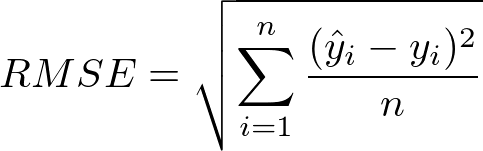

In [ ]:
gscv = RandomizedSearchCV(estimator = cbc,  param_distributions =params, scoring ='neg_root_mean_squared_error', cv = 5)

In [ ]:
gscv.fit(X,y)

In [ ]:
gscv.best_params_

{'depth': 7, 'l2_leaf_reg': 9, 'learning_rate': 0.1, 'n_estimators': 1054}

In [ ]:
model1 = CatBoostRegressor(loss_function='RMSE',max_depth=7,l2_leaf_reg=9,learning_rate=0.1,n_estimators=1054)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print(' :',sqrt(mean_squared_error(y_test, y_pred)))

0:	learn: 0.6052344	total: 6.75ms	remaining: 7.11s
1:	learn: 0.5644042	total: 13.4ms	remaining: 7.04s
2:	learn: 0.5281607	total: 19.6ms	remaining: 6.85s
3:	learn: 0.4947185	total: 25.9ms	remaining: 6.81s
4:	learn: 0.4664418	total: 32.3ms	remaining: 6.79s
5:	learn: 0.4421609	total: 38.7ms	remaining: 6.76s
6:	learn: 0.4203184	total: 45.3ms	remaining: 6.77s
7:	learn: 0.4010890	total: 51.4ms	remaining: 6.72s
8:	learn: 0.3829321	total: 57.7ms	remaining: 6.7s
9:	learn: 0.3656976	total: 64.1ms	remaining: 6.7s
10:	learn: 0.3511003	total: 70.5ms	remaining: 6.69s
11:	learn: 0.3380847	total: 76.8ms	remaining: 6.67s
12:	learn: 0.3270953	total: 83.1ms	remaining: 6.65s
13:	learn: 0.3158556	total: 89.5ms	remaining: 6.65s
14:	learn: 0.3046117	total: 95.7ms	remaining: 6.63s
15:	learn: 0.2960159	total: 102ms	remaining: 6.63s
16:	learn: 0.2887662	total: 109ms	remaining: 6.63s
17:	learn: 0.2814568	total: 115ms	remaining: 6.62s
18:	learn: 0.2745358	total: 121ms	remaining: 6.62s
19:	learn: 0.2678021	total: 

In [ ]:
from sklearn.model_selection import KFold

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    model1.fit(X_train, y_train,eval_set=[(X_test, y_test)], verbose=0)

    y_pred_lgbm = model1.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = model1.predict(test_ff_r)
    y_pred_totlgb.append(p)

RMSLE LGBM:  0.18214886987383802
RMSLE LGBM:  0.1548243259022699
RMSLE LGBM:  0.17043396219517754
RMSLE LGBM:  0.17271110899588699
RMSLE LGBM:  0.22004010314194136
RMSLE LGBM:  0.17107862148530437
RMSLE LGBM:  0.16917399336839908
RMSLE LGBM:  0.18798316744127813
RMSLE LGBM:  0.18066252640174923
RMSLE LGBM:  0.1728274940816219
RMSLE LGBM:  0.17028998655464944
RMSLE LGBM:  0.22200824070858077
RMSLE LGBM:  0.18332749942937795
RMSLE LGBM:  0.17317746165966308
RMSLE LGBM:  0.152798951523491
RMSLE LGBM:  0.20537410347650636
RMSLE LGBM:  0.19958703214753007
RMSLE LGBM:  0.17998452131771098
RMSLE LGBM:  0.17216129983536135
RMSLE LGBM:  0.15193926356703863


In [ ]:
gb_c = (np.mean(y_pred_totlgb,0))
gb_c=np.expm1(gb_c).round(2)

In [ ]:
gb_c

array([ 40.5 ,  39.87,  45.53, ...,  38.47, 212.37, 102.71])

In [ ]:
final_data1 = {'ID ': ts['ID'], 'Response':gb_c }
c_2 = pd.DataFrame(data=final_data1)
c_2

,ID,Response
0,ID_00OZLF7X,40.50
1,ID_00ZI0D98,39.87
2,ID_017GTLAU,45.53
3,ID_01IBM7T2,38.08
4,ID_01II27D4,56.33
...,...,...
2728,ID_ZW5RSNUS,27.01
2729,ID_ZWCI817N,97.81
2730,ID_ZX5858FJ,38.47
2731,ID_ZY4XOL2H,212.37


In [ ]:
%cd "/content"
c_2.to_csv('parameter_tuning_2.csv', index =False)

/content


In [ ]:
yu=pd.read_csv('/content/lll.csv')

k=yu['Response'] + c_2['Response']

p=k/2

p

0        40.660
1        41.125
2        45.685
3        40.345
4        57.370
         ...   
2728     26.545
2729     94.065
2730     37.985
2731    233.030
2732    106.250
Name: Response, Length: 2733, dtype: float64

In [ ]:
final_data1 = {'ID ': ts['ID'], 'Response':p }
c_2 = pd.DataFrame(data=final_data1)
c_2

,ID,Response
0,ID_00OZLF7X,40.660
1,ID_00ZI0D98,41.125
2,ID_017GTLAU,45.685
3,ID_01IBM7T2,40.345
4,ID_01II27D4,57.370
...,...,...
2728,ID_ZW5RSNUS,26.545
2729,ID_ZWCI817N,94.065
2730,ID_ZX5858FJ,37.985
2731,ID_ZY4XOL2H,233.030


In [ ]:
%cd "/content"
c_2.to_csv('iop.csv', index =False)

/content
